<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [1]:
# a)
import random

def biased_dice(sides=8):
    while True:
        yield random.choices(range(1,sides+1), range(1,sides+1))[0]
        
d8=biased_dice()
next(d8)

4

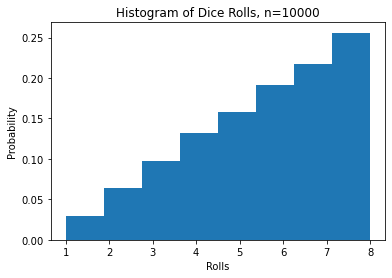

In [2]:
# b)
import matplotlib.pyplot as plt
import pandas as pd

hist_data=pd.DataFrame([next(d8) for i in range(10000)])
plt.hist(hist_data, 8, density=True)
plt.xlabel('Rolls')
plt.ylabel('Probability')
plt.title('Histogram of Dice Rolls, n=10000')
plt.show()

In [3]:
# c)
import time 
def biased_dice2(n=8):
    values=list(range(1,n+1))
    start=time.time()
    while values:
        roll=random.choices(range(1,n+1), range(1,n+1))[0]
        try:
            print(f"rolled a {roll}")
            values.remove(roll)
        except ValueError:
            pass
        
        print(f" values yet to hit: {values}")
        yield roll
    end=time.time()
    return f"Time elapsed: {end-start:.2f} seconds"

In [4]:
d8_stop=biased_dice2()
while True:
    try:
        next(d8_stop)
    except StopIteration as e:
        print(e)
        break

rolled a 3
 values yet to hit: [1, 2, 4, 5, 6, 7, 8]
rolled a 5
 values yet to hit: [1, 2, 4, 6, 7, 8]
rolled a 3
 values yet to hit: [1, 2, 4, 6, 7, 8]
rolled a 4
 values yet to hit: [1, 2, 6, 7, 8]
rolled a 3
 values yet to hit: [1, 2, 6, 7, 8]
rolled a 5
 values yet to hit: [1, 2, 6, 7, 8]
rolled a 6
 values yet to hit: [1, 2, 7, 8]
rolled a 7
 values yet to hit: [1, 2, 8]
rolled a 7
 values yet to hit: [1, 2, 8]
rolled a 3
 values yet to hit: [1, 2, 8]
rolled a 6
 values yet to hit: [1, 2, 8]
rolled a 8
 values yet to hit: [1, 2]
rolled a 7
 values yet to hit: [1, 2]
rolled a 2
 values yet to hit: [1]
rolled a 8
 values yet to hit: [1]
rolled a 4
 values yet to hit: [1]
rolled a 8
 values yet to hit: [1]
rolled a 6
 values yet to hit: [1]
rolled a 6
 values yet to hit: [1]
rolled a 6
 values yet to hit: [1]
rolled a 3
 values yet to hit: [1]
rolled a 7
 values yet to hit: [1]
rolled a 6
 values yet to hit: [1]
rolled a 8
 values yet to hit: [1]
rolled a 6
 values yet to hit: [1]
ro

### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

In [72]:
import random
import time
import pandas as pd
from IPython.display import display
from matplotlib.patches import Patch

class User:
    def __init__(self,uid,start,destination):
        self.uid=uid
        self.start=start
        self.destination=destination
    

class Elevator:
    MOVING_TIME = 5
    STOPPING_TIME = 10 
    
    def __init__(self, n_floors=3, eid=1):
        self.n_floors=n_floors
        self.current_floor=0
        self.total_time=0
        self.destinations=set([0])
        self.users = pd.DataFrame(columns=['uid', 'start', 'destination'])
        self.stops = [0] * n_floors 
        self.timetable=pd.DataFrame({'floor':[0], 'time':[0], 'stop': [False]})
        self.eid=eid
    
    def call(self, floor):
        if floor < 0 or floor > self.n_floors:
            raise ValueError(f"Please choose a valid floor between 0 and {self.n_floors}!")
        self.destinations.add(floor)
    
    def press_button(self, user):
        if user.start==user.destination:
            print(f"User {user.uid} realized, he did not need the elevator and left again!")
            return
        floor=user.destination
        if floor < 0 or floor > self.n_floors:
            raise ValueError(f"Please choose a valid floor between 0 and {self.n_floors}!")
        self.destinations.add(floor)
        self.users = pd.concat([self.users, pd.DataFrame({'uid': [user.uid], 'start': [user.start], 'destination': [user.destination]})], ignore_index=True)
        
    
    def go_to_floor(self, floor):
        if floor < 0 or floor > self.n_floors:
            raise ValueError(f"Please choose a valid floor between 0 and {self.n_floors}!")
            
        self.note_position(self.current_floor, floor)
        self.current_floor=floor
    
    def stop_at_floor(self):
        self.stops[self.current_floor-1] += 1 
        for idx, row in self.users.iterrows():
            if row['destination'] == self.current_floor:
                self.users = self.users.drop(idx)
        
    
    def note_position(self,start, end):
        if start==end:
            return
        print(f"\nElevator moving from floor {start} to floor {end}... ")
    
        if start <= end:
            for i in range(start+1, end+1):
                if i==end:
                    self.timetable= pd.concat([self.timetable, pd.DataFrame({'floor': [i], 'time': [self.MOVING_TIME], 'stop': [False]})], ignore_index=True)
                    self.timetable= pd.concat([self.timetable, pd.DataFrame({'floor': [i], 'time': [self.STOPPING_TIME], 'stop': [True]})], ignore_index=True)
                else:
                    self.timetable= pd.concat([self.timetable, pd.DataFrame({'floor': [i], 'time': [self.MOVING_TIME], 'stop': [False]})], ignore_index=True)         
                    
        else:
            for i in range(start-1, end-1, -1):
                if i==end:
                    self.timetable= pd.concat([self.timetable, pd.DataFrame({'floor': [i], 'time': [self.MOVING_TIME], 'stop': [False]})], ignore_index=True)
                    self.timetable= pd.concat([self.timetable, pd.DataFrame({'floor': [i], 'time': [self.STOPPING_TIME], 'stop': [True]})], ignore_index=True)
                else:
                    self.timetable= pd.concat([self.timetable, pd.DataFrame({'floor': [i], 'time': [self.MOVING_TIME], 'stop': [False]})], ignore_index=True)
    
        self.timetable['cum.time']=self.timetable.time.cumsum()
        
                
    def simulate(self, users_to_serve):
            print(f"Elevator is currently at floor {self.current_floor}")
            
            print("Users waiting for elevator:")
            display(users_to_serve.style.hide())
            
            for idx, user in users_to_serve.iterrows():
                    self.call(user.start)
    
            while True:
                    next_floor=0
        
                    if self.current_floor < max(self.destinations): ## go up
                        upper_floors = {x for x in self.destinations if x >= self.current_floor}
                        next_floor = min(upper_floors)
                
                    else: ## go down
                        lower_floors = {x for x in self.destinations if x <= self.current_floor}
                        next_floor = max(lower_floors)
                    
                    self.destinations.remove(next_floor)
                    self.go_to_floor(next_floor)
                    self.stop_at_floor()
                    
    
                    users_to_remove = []
                    for idx, user in users_to_serve.iterrows(): 
                        if user.start == self.current_floor:
                            self.press_button(user)
                            users_to_remove.append(user.uid)
                            
                
                    users_to_serve = users_to_serve[~users_to_serve['uid'].isin(users_to_remove)]
                    
                    if not self.destinations:
                        print("Nothing to do!")
                        self.generate_plot()
                        break

                    
    def generate_plot(self):
        data = self.timetable # assuming self.timetable is the data you want to plot
        
        red_patch = Patch(color='r', label='Stopped')
        blue_patch = Patch(color='b', label='Moving')
        patches = []
        colors = {True: 'r', False: 'b'}
        
        f1 = plt.figure()
        #plt.clf()
        plt.barh(y=data['floor'], width=data['time'], left=data['cum.time'], color=[colors[i] for i in data['stop']])
        plt.xlabel('time elapsed (s)')
        plt.ylabel('Floor Number')
        plt.title(f'Simulation Results showing elevator {self.eid} position over time')
        plt.legend(handles=[red_patch, blue_patch])
        plt.show()
    

In [73]:
def generate_users(n_users=10, n_floors=25):
    users_to_serve = pd.DataFrame(columns=['uid', 'start', 'destination'])
    for i in range(n_users):
        start = random.randint(0, n_floors)
        destination = random.randint(0, n_floors)
        user = User(i, start, destination)
        users_to_serve = pd.concat([users_to_serve, pd.DataFrame({'uid': [user.uid], 'start': [user.start], 'destination': [user.destination]})], ignore_index=True)
    return users_to_serve

In [74]:
users_to_serve=generate_users(10)

Elevator is currently at floor 0
Users waiting for elevator:


uid,start,destination
0,15,20
1,9,9
2,8,16
3,7,13
4,16,15
5,1,15
6,16,18
7,0,24
8,25,1
9,22,5



Elevator moving from floor 0 to floor 1... 

Elevator moving from floor 1 to floor 7... 

Elevator moving from floor 7 to floor 8... 

Elevator moving from floor 8 to floor 9... 
User 1 realized, he did not need the elevator and left again!

Elevator moving from floor 9 to floor 13... 

Elevator moving from floor 13 to floor 15... 

Elevator moving from floor 15 to floor 16... 

Elevator moving from floor 16 to floor 18... 

Elevator moving from floor 18 to floor 20... 

Elevator moving from floor 20 to floor 22... 

Elevator moving from floor 22 to floor 24... 

Elevator moving from floor 24 to floor 25... 

Elevator moving from floor 25 to floor 15... 

Elevator moving from floor 15 to floor 5... 

Elevator moving from floor 5 to floor 1... 
Nothing to do!


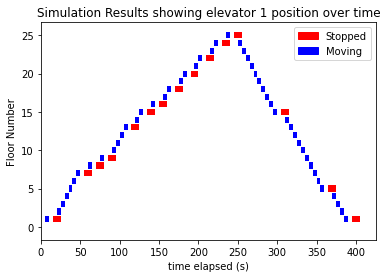

In [75]:
e=Elevator(25)
e.simulate(users_to_serve)

In [76]:
import numpy as np

class Building:
    def __init__(self, n_elevators=3, n_floors=25):
        self.elevators=[]
        for i in range(n_elevators):
            self.elevators.append(Elevator(n_floors=n_floors, eid=i))
    def simulate(self, users_to_serve):
        
        users=users_to_serve.sort_values(by='start')
        users=np.array_split(users, len(self.elevators)) 

        for idx,e in enumerate(self.elevators):
            e.simulate(users[idx])
    

In [77]:
n_floors=25
users_to_serve=generate_users(100, n_floors)

In [79]:
b=Building(n_elevators=4, n_floors=n_floors)

Elevator is currently at floor 0
Users waiting for elevator:


uid,start,destination
47,0,11
3,0,11
26,0,21
40,0,0
76,1,11
95,2,5
53,2,21
93,2,9
98,3,8
31,3,1


User 40 realized, he did not need the elevator and left again!

Elevator moving from floor 0 to floor 1... 

Elevator moving from floor 1 to floor 2... 

Elevator moving from floor 2 to floor 3... 

Elevator moving from floor 3 to floor 4... 

Elevator moving from floor 4 to floor 5... 

Elevator moving from floor 5 to floor 6... 

Elevator moving from floor 6 to floor 7... 

Elevator moving from floor 7 to floor 8... 

Elevator moving from floor 8 to floor 9... 

Elevator moving from floor 9 to floor 11... 

Elevator moving from floor 11 to floor 12... 

Elevator moving from floor 12 to floor 13... 

Elevator moving from floor 13 to floor 17... 

Elevator moving from floor 17 to floor 21... 

Elevator moving from floor 21 to floor 23... 

Elevator moving from floor 23 to floor 24... 

Elevator moving from floor 24 to floor 25... 

Elevator moving from floor 25 to floor 6... 

Elevator moving from floor 6 to floor 3... 

Elevator moving from floor 3 to floor 2... 

Elevator moving from

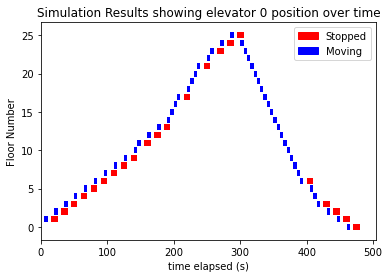

Elevator is currently at floor 0
Users waiting for elevator:


uid,start,destination
90,8,4
96,8,8
1,8,16
27,9,15
97,10,4
15,10,13
44,10,4
66,10,0
9,11,1
13,11,13



Elevator moving from floor 0 to floor 8... 
User 96 realized, he did not need the elevator and left again!

Elevator moving from floor 8 to floor 9... 

Elevator moving from floor 9 to floor 10... 

Elevator moving from floor 10 to floor 11... 

Elevator moving from floor 11 to floor 12... 

Elevator moving from floor 12 to floor 13... 

Elevator moving from floor 13 to floor 14... 

Elevator moving from floor 14 to floor 15... 

Elevator moving from floor 15 to floor 16... 

Elevator moving from floor 16 to floor 17... 

Elevator moving from floor 17 to floor 19... 

Elevator moving from floor 19 to floor 21... 

Elevator moving from floor 21 to floor 22... 

Elevator moving from floor 22 to floor 10... 

Elevator moving from floor 10 to floor 7... 

Elevator moving from floor 7 to floor 4... 

Elevator moving from floor 4 to floor 3... 

Elevator moving from floor 3 to floor 1... 

Elevator moving from floor 1 to floor 0... 
Nothing to do!


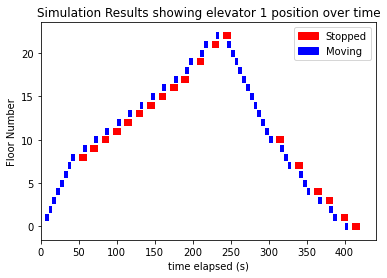

Elevator is currently at floor 0
Users waiting for elevator:


uid,start,destination
45,15,6
58,16,18
38,16,2
88,16,17
50,16,3
86,16,9
41,16,8
52,17,14
46,17,6
35,17,8



Elevator moving from floor 0 to floor 15... 

Elevator moving from floor 15 to floor 16... 

Elevator moving from floor 16 to floor 17... 

Elevator moving from floor 17 to floor 18... 

Elevator moving from floor 18 to floor 19... 
User 71 realized, he did not need the elevator and left again!

Elevator moving from floor 19 to floor 20... 

Elevator moving from floor 20 to floor 22... 

Elevator moving from floor 22 to floor 24... 

Elevator moving from floor 24 to floor 14... 

Elevator moving from floor 14 to floor 12... 

Elevator moving from floor 12 to floor 10... 

Elevator moving from floor 10 to floor 9... 

Elevator moving from floor 9 to floor 8... 

Elevator moving from floor 8 to floor 7... 

Elevator moving from floor 7 to floor 6... 

Elevator moving from floor 6 to floor 3... 

Elevator moving from floor 3 to floor 2... 

Elevator moving from floor 2 to floor 0... 
Nothing to do!


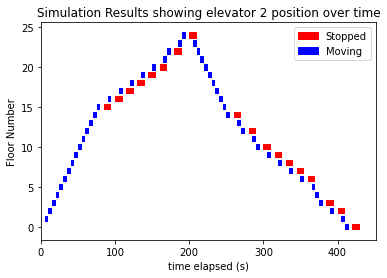

Elevator is currently at floor 0
Users waiting for elevator:


uid,start,destination
64,20,7
43,20,9
24,21,5
92,21,15
91,21,21
89,21,9
69,21,24
67,21,12
59,21,16
83,22,4



Elevator moving from floor 0 to floor 20... 

Elevator moving from floor 20 to floor 21... 
User 91 realized, he did not need the elevator and left again!

Elevator moving from floor 21 to floor 22... 

Elevator moving from floor 22 to floor 23... 
User 60 realized, he did not need the elevator and left again!

Elevator moving from floor 23 to floor 24... 

Elevator moving from floor 24 to floor 25... 

Elevator moving from floor 25 to floor 23... 

Elevator moving from floor 23 to floor 22... 

Elevator moving from floor 22 to floor 21... 

Elevator moving from floor 21 to floor 19... 

Elevator moving from floor 19 to floor 17... 

Elevator moving from floor 17 to floor 16... 

Elevator moving from floor 16 to floor 15... 

Elevator moving from floor 15 to floor 13... 

Elevator moving from floor 13 to floor 12... 

Elevator moving from floor 12 to floor 11... 

Elevator moving from floor 11 to floor 9... 

Elevator moving from floor 9 to floor 7... 

Elevator moving from floor 7 to

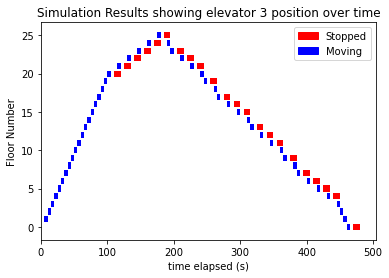

In [80]:
b.simulate(users_to_serve)